In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

# Load the dataset
data=pd.read_excel('telcom_data.xlsx')

C:\Users\sneha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print("The shape of data is",data.shape)

The shape of data is (150001, 55)


In [3]:
#Fields Description


#bearer id	xDr session identifier
#Dur. (ms)	Total Duration of the xDR (in ms)
#Start	Start time of the xDR (first frame timestamp)
#Start ms	Milliseconds offset of start time for the xDR (first frame timestamp)
#End	End time of the xDR (last frame timestamp)
#End ms	Milliseconds offset of end time of the xDR (last frame timestamp)
#Dur. (s)	Total Duration of the xDR (in s)
#IMSI	International Mobile Subscriber Identity
#MSISDN/Number	MS International PSTN/ISDN Number of mobile - customer number
#IMEI	International Mobile Equipment Identity
#Last Location Name	User location call name (2G/3G/4G) at the end of the bearer
#Avg RTT DL (ms)	Average Round Trip Time measurement Downlink direction (msecond)
#Avg RTT UL (ms)	Average Round Trip Time measurement Uplink direction (msecond)
#Avg Bearer TP DL (kbps)	Average Bearer Throughput for Downlink (kbps) - based on BDR duration
#Avg Bearer TP UL (kbps)	Average Bearer Throughput for uplink (kbps) - based on BDR duration
#TCP DL Retrans. Vol (Bytes)	TCP volume of Downlink packets detected as retransmitted (bytes)
#TCP UL Retrans. Vol (Bytes)	TCP volume of Uplink packets detected as retransmitted (bytes)
#DL TP < 50 Kbps (%)	Duration ratio when Bearer Downlink Throughput < ….
#50 Kbps < DL TP < 250 Kbps (%)	Duration ratio when Bearer Downlink Throughput range is …
#250 Kbps < DL TP < 1 Mbps (%)	Duration ratio when Bearer Downlink Throughput range is …
#DL TP > 1 Mbps (%)	Duration ratio when Bearer Downlink Throughput > ….
#UL TP < 10 Kbps (%)	Duration ratio when Bearer Uplink Throughput < ….
#10 Kbps < UL TP < 50 Kbps (%)	Duration ratio when Bearer Uplink Throughput range is …
#50 Kbps < UL TP < 300 Kbps (%)	Duration ratio when Bearer Uplink Throughput range is …
#UL TP > 300 Kbps (%)	Duration ratio when Bearer Uplink Throughput > ….
#HTTP DL (Bytes)	HTTP data volume (in Bytes) received by the MS during this session
#HTTP UL (Bytes)	HTTP data volume (in Bytes) sent by the MS during this session
#Activity Duration DL (ms)	Activity Duration for downlink (ms) - excluding periods of inactivity > 500 ms
#Activity Duration UL (ms)	Activity Duration for uplink (ms) - excluding periods of inactivity > 500 ms
#Dur. (ms).1	Total Duration of the xDR (in ms)
#Handset Manufacturer	Handset manufacturer 
#Handset Type	Handset type of the mobile device
#Nb of sec with 125000B < Vol DL	Number of seconds with IP Volume DL >
#Nb of sec with 1250B < Vol UL < 6250B	Number of seconds with IP Volume UL between …
#Nb of sec with 31250B < Vol DL < 125000B	Number of seconds with IP Volume DL between …
#Nb of sec with 37500B < Vol UL	Number of seconds with IP Volume UL >
#Nb of sec with 6250B < Vol DL < 31250B	Number of seconds with IP Volume DL between …
#Nb of sec with 6250B < Vol UL < 37500B	Number of seconds with IP Volume UL between …
#Nb of sec with Vol DL < 6250B	Number of seconds with IP Volume DL <
#Nb of sec with Vol UL < 1250B	Number of seconds with IP Volume UL <
#Social Media DL (Bytes)	Social Media data volume (in Bytes) received by the MS during this session
#Social Media UL (Bytes)	Social Media data volume (in Bytes) sent by the MS during this session
#YouTube DL (Bytes)	YouTube data volume (in Bytes) received by the MS during this session
#YouTube UL (Bytes)	YouTube data volume (in Bytes) sent by the MS during this session
#Netflix DL (Bytes)	Netflix data volume (in Bytes) received by the MS during this session
#Netflix UL (Bytes)	Netflix data volume (in Bytes) sent by the MS during this session
#Google DL (Bytes)	Google data volume (in Bytes) Received by the MS during this session
#Google UL (Bytes)	Google data volume (in Bytes) sent by the MS during this session
#Email DL (Bytes)	Email data volume (in Bytes) Received by the MS during this session
#Email UL (Bytes)	Email data volume (in Bytes) sent by the MS during this session
#Gaming DL (Bytes)	Gaming data volume (in Bytes) Received by the MS during this session
#Gaming UL (Bytes)	Gaming data volume (in Bytes) sent by the MS during this session
#Other DL	Other data volume (in Bytes) received by the MS during this session
#Other UL	Other data volume (in Bytes) sent by the MS during this session
#Total DL (Bytes)	Data volume (in Bytes) received by the MS during this session (IP layer + overhead)
#Total UL (Bytes)	Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)


In [4]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [6]:
## Processing the Data

def preprocessing(data):
    categorical_cols = []
    continious_cols = []
    for col in data.columns:
        if data[col].dtypes == "object":
            categorical_cols.append(col)
            data[col].fillna(data[col].mode()[0], inplace = True)
            
        else:
            data[col].fillna(data[col].mean(), inplace = True)
            continious_cols.append(col)
    return categorical_cols,continious_cols, data

categorical_cols,continious_cols, data_preprocessed = preprocessing(data)

### Task 4.1

In [7]:
## Getting Total Traffic

data['Total_Traffic'] = data['Total UL (Bytes)']+data['Total DL (Bytes)']



In [8]:
## Engagement Metrics

engagement_metrics = data.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'Dur. (ms)': 'sum', 'Total_Traffic': 'sum'})
engagement_metrics.columns = ['Sessions Frequency', 'Session Duration', 'Session Total Traffic']

In [9]:
## Scaling the Data

scaler = MinMaxScaler()
normalized_engagement_metrics = scaler.fit_transform(engagement_metrics)

In [10]:
## K-Means

kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_engagement_metrics)
engagement_metrics['Cluster'] = kmeans.labels_


In [11]:
## Getting TCP Retransmission

data['TCP Retransmission'] = data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']
tcp_retransmission = data.groupby('MSISDN/Number')['TCP Retransmission'].mean()
tcp_retransmission

MSISDN/Number
3.360100e+10    2.156957e+07
3.360100e+10    2.156957e+07
3.360100e+10    2.156957e+07
3.360101e+10    7.607247e+05
3.360101e+10    1.547020e+07
                    ...     
3.379000e+10    2.156957e+07
4.188282e+10    1.698397e+07
3.197021e+12    2.156957e+07
3.370000e+14    2.156957e+07
8.823971e+14    2.156957e+07
Name: TCP Retransmission, Length: 106857, dtype: float64

In [12]:
data['RTT'] = (data['Avg RTT DL (ms)'] + data['Avg RTT UL (ms)']) 
rtt = data.groupby('MSISDN/Number')['RTT'].mean()

handset_type = data.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode())

data['Throughput'] = data['Avg Bearer TP DL (kbps)']+data['Avg Bearer TP UL (kbps)']
throughput = data.groupby('MSISDN/Number')['Throughput'].mean()

experience_metrics = pd.concat([tcp_retransmission, rtt, throughput], axis=1)
experience_metrics.columns = ['TCP Retransmission', 'RTT', 'Throughput']




In [13]:
rtt

MSISDN/Number
3.360100e+10     46.000000
3.360100e+10     31.000000
3.360100e+10    127.458589
3.360101e+10     84.000000
3.360101e+10     59.500000
                   ...    
3.379000e+10     40.000000
4.188282e+10    309.123982
3.197021e+12    127.458589
3.370000e+14    127.458589
8.823971e+14    127.458589
Name: RTT, Length: 106857, dtype: float64

In [14]:
throughput

MSISDN/Number
3.360100e+10       76.000000
3.360100e+10       99.000000
3.360100e+10       97.000000
3.360101e+10      248.000000
3.360101e+10    28422.000000
                    ...     
3.379000e+10      116.000000
4.188282e+10    16958.943222
3.197021e+12        1.000000
3.370000e+14       33.000000
8.823971e+14        2.000000
Name: Throughput, Length: 106857, dtype: float64

In [15]:
experience_metrics

,TCP Retransmission,RTT,Throughput
MSISDN/Number,,,
3.360100e+10,2.156957e+07,46.000000,76.000000
3.360100e+10,2.156957e+07,31.000000,99.000000
3.360100e+10,2.156957e+07,127.458589,97.000000
3.360101e+10,7.607247e+05,84.000000,248.000000
3.360101e+10,1.547020e+07,59.500000,28422.000000
...,...,...,...
3.379000e+10,2.156957e+07,40.000000,116.000000
4.188282e+10,1.698397e+07,309.123982,16958.943222
3.197021e+12,2.156957e+07,127.458589,1.000000


In [16]:
## Process the data for K-Means

def preprocessing(data):
    categorical_cols = []
    continious_cols = []
    for col in data.columns:
        if data[col].dtypes == "object":
            categorical_cols.append(col)
            data[col].fillna(data[col].mode()[0], inplace = True)
            
        else:
            data[col].fillna(data[col].mean(), inplace = True)
            continious_cols.append(col)
    return categorical_cols,continious_cols, data

categorical_cols,continious_cols, data_preprocessed = preprocessing(data)

In [17]:
scaler = MinMaxScaler()
normalized_experience_metrics = scaler.fit_transform(experience_metrics)


In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_experience_metrics)
experience_metrics['Cluster'] = kmeans.labels_

In [19]:
less_engaged_cluster_center = kmeans.cluster_centers_[np.argmin(kmeans.cluster_centers_[:, 0])]
engagement_score = cdist(normalized_engagement_metrics, [less_engaged_cluster_center], metric='euclidean').flatten()

# Assign an experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster.
worst_experience_cluster_center = kmeans.cluster_centers_[np.argmax(kmeans.cluster_centers_[:, 0])]
experience_score = cdist(normalized_experience_metrics, [worst_experience_cluster_center], metric='euclidean').flatten()

In [20]:
less_engaged_cluster_center

array([0.00410265, 0.00148163, 0.00779025])

In [21]:
engagement_score

array([0.00743473, 0.00864839, 0.00788856, ..., 0.01350504, 0.00811065,
       0.01352165])

In [22]:
worst_experience_cluster_center

array([0.01758266, 0.00098064, 0.29539768])

In [23]:
experience_score

array([0.29539793, 0.29531731, 0.2953238 , ..., 0.2956616 , 0.295549  ,
       0.29565808])

In [24]:
engagement_metrics['engagement_score'] = engagement_score
engagement_metrics['experience_score'] = experience_score

In [25]:
engagement_metrics

,Sessions Frequency,Session Duration,Session Total Traffic,Cluster,engagement_score,experience_score
MSISDN/Number,,,,,,
3.360100e+10,1,1.167200e+05,8.786906e+08,2,0.007435,0.295398
3.360100e+10,1,1.812300e+05,1.568596e+08,2,0.008648,0.295317
3.360100e+10,1,1.349690e+05,5.959665e+08,2,0.007889,0.295324
3.360101e+10,1,4.987800e+04,4.223207e+08,2,0.008213,0.295038
3.360101e+10,2,3.710400e+04,1.457411e+09,2,0.006106,0.195796
...,...,...,...,...,...,...
3.379000e+10,1,1.409880e+05,4.803073e+08,2,0.008078,0.295257
4.188282e+10,1066,7.255100e+07,5.317447e+11,1,1.724335,0.236073
3.197021e+12,1,8.773850e+05,2.321240e+08,0,0.013505,0.295662


### Task 4.2

In [26]:
engagement_metrics['satisfaction_score'] = (engagement_metrics['engagement_score'] + engagement_metrics['experience_score'])/2

In [27]:
engagement_metrics

,Sessions Frequency,Session Duration,Session Total Traffic,Cluster,engagement_score,experience_score,satisfaction_score
MSISDN/Number,,,,,,,
3.360100e+10,1,1.167200e+05,8.786906e+08,2,0.007435,0.295398,0.151416
3.360100e+10,1,1.812300e+05,1.568596e+08,2,0.008648,0.295317,0.151983
3.360100e+10,1,1.349690e+05,5.959665e+08,2,0.007889,0.295324,0.151606
3.360101e+10,1,4.987800e+04,4.223207e+08,2,0.008213,0.295038,0.151625
3.360101e+10,2,3.710400e+04,1.457411e+09,2,0.006106,0.195796,0.100951
...,...,...,...,...,...,...,...
3.379000e+10,1,1.409880e+05,4.803073e+08,2,0.008078,0.295257,0.151668
4.188282e+10,1066,7.255100e+07,5.317447e+11,1,1.724335,0.236073,0.980204
3.197021e+12,1,8.773850e+05,2.321240e+08,0,0.013505,0.295662,0.154583


In [28]:
## Top 10 satisfied Customers

engagement_metrics['satisfaction_score'].nlargest(10)

MSISDN/Number
4.188282e+10    0.980204
3.366232e+10    0.525170
3.369858e+10    0.503842
3.365871e+10    0.494003
3.366491e+10    0.493935
3.365863e+10    0.493045
3.366613e+10    0.486310
3.366877e+10    0.480325
3.366131e+10    0.477755
3.366240e+10    0.474832
Name: satisfaction_score, dtype: float64

In [29]:
engagement_metrics

,Sessions Frequency,Session Duration,Session Total Traffic,Cluster,engagement_score,experience_score,satisfaction_score
MSISDN/Number,,,,,,,
3.360100e+10,1,1.167200e+05,8.786906e+08,2,0.007435,0.295398,0.151416
3.360100e+10,1,1.812300e+05,1.568596e+08,2,0.008648,0.295317,0.151983
3.360100e+10,1,1.349690e+05,5.959665e+08,2,0.007889,0.295324,0.151606
3.360101e+10,1,4.987800e+04,4.223207e+08,2,0.008213,0.295038,0.151625
3.360101e+10,2,3.710400e+04,1.457411e+09,2,0.006106,0.195796,0.100951
...,...,...,...,...,...,...,...
3.379000e+10,1,1.409880e+05,4.803073e+08,2,0.008078,0.295257,0.151668
4.188282e+10,1066,7.255100e+07,5.317447e+11,1,1.724335,0.236073,0.980204
3.197021e+12,1,8.773850e+05,2.321240e+08,0,0.013505,0.295662,0.154583


### Task 4.3

In [30]:
## Regression Model  --> Linear Regression Model

# Define X and y
X,y =  engagement_metrics.drop(["satisfaction_score"], axis =1 ), engagement_metrics["satisfaction_score"]

In [31]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85485, 6), (21372, 6), (85485,), (21372,))

In [33]:
# Modelling
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Starting training
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([0.085757  , 0.01866561, 0.15194611, ..., 0.03542516, 0.15180689,
       0.15115482])

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_test, y_pred)

1.0

In [38]:
y_pred_train = model.predict(X_train)

In [39]:
y_pred_train

array([0.15164942, 0.0948092 , 0.06671108, ..., 0.10656637, 0.10732803,
       0.15145246])

In [40]:
r2_score(y_train, y_pred_train)

1.0

In [41]:
import matplotlib.pyplot as plt

In [42]:
index = []
for i in range(len(X_test)):
    index.append(i)

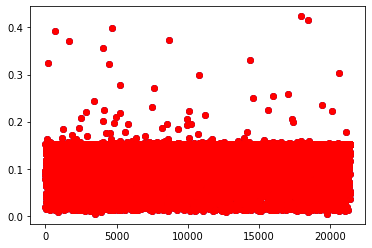

In [43]:
plt.scatter( index,y_test, color =  "darkblue")
plt.scatter( index,y_pred, color =  "red")

### Task 4.4

In [44]:
cluster_data = engagement_metrics.iloc[:,4:6]
cluster_data

,engagement_score,experience_score
MSISDN/Number,,
3.360100e+10,0.007435,0.295398
3.360100e+10,0.008648,0.295317
3.360100e+10,0.007889,0.295324
3.360101e+10,0.008213,0.295038
3.360101e+10,0.006106,0.195796
...,...,...
3.379000e+10,0.008078,0.295257
4.188282e+10,1.724335,0.236073
3.197021e+12,0.013505,0.295662


In [45]:
km = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)
label = km.fit_predict(cluster_data)
centroids = km.cluster_centers_
print(f'# Centroids of the clustering:\n{centroids}')
print(f'# The number of iterations required to converge: {km.inertia_}')
print(f'# The number of iterations required to converge: {km.n_iter_}')

# Centroids of the clustering:
[[0.00761603 0.1348534 ]
 [0.00792592 0.28450955]]
# The number of iterations required to converge: 128.5133063738884
# The number of iterations required to converge: 9


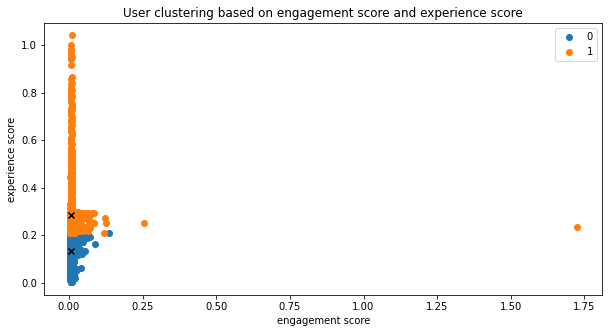

In [46]:
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(10,5))
plt.title(f'User clustering based on engagement score and experience score')
for i in u_labels:
    plt.scatter(cluster_data[label == i].iloc[:,0] , cluster_data[label == i].iloc[:,1], marker='o', label = i)
plt.scatter(centroids[:,0] , centroids[:,1], marker='x', color = 'black')
plt.xlabel("engagement score")
plt.ylabel("experience score")
plt.legend()
plt.savefig('kmeans.png')
plt.show()

### Task 4.5

In [47]:
Aggregate_data = engagement_metrics.copy(deep=True)
Aggregate_data['cluster'] = label
Aggregate_data

,Sessions Frequency,Session Duration,Session Total Traffic,Cluster,engagement_score,experience_score,satisfaction_score,cluster
MSISDN/Number,,,,,,,,
3.360100e+10,1,1.167200e+05,8.786906e+08,2,0.007435,0.295398,0.151416,1
3.360100e+10,1,1.812300e+05,1.568596e+08,2,0.008648,0.295317,0.151983,1
3.360100e+10,1,1.349690e+05,5.959665e+08,2,0.007889,0.295324,0.151606,1
3.360101e+10,1,4.987800e+04,4.223207e+08,2,0.008213,0.295038,0.151625,1
3.360101e+10,2,3.710400e+04,1.457411e+09,2,0.006106,0.195796,0.100951,0
...,...,...,...,...,...,...,...,...
3.379000e+10,1,1.409880e+05,4.803073e+08,2,0.008078,0.295257,0.151668,1
4.188282e+10,1066,7.255100e+07,5.317447e+11,1,1.724335,0.236073,0.980204,1
3.197021e+12,1,8.773850e+05,2.321240e+08,0,0.013505,0.295662,0.154583,1


In [48]:
Aggregate_columns = {'engagement_score':'mean','experience_score':'mean','satisfaction_score':'mean'}
#Group and Aggregate
Aggregate_data =Aggregate_data.groupby('cluster').agg(Aggregate_columns)

In [49]:
Aggregate_data

,engagement_score,experience_score,satisfaction_score
cluster,,,
0,0.007616,0.134767,0.071192
1,0.007926,0.284488,0.146207


### Task 4.6

In [50]:
Final_Table = engagement_metrics.copy(deep=True)
Final_Table.reset_index(inplace=True)
Final_Table = Final_Table.rename(columns={'MSISDN/Number': 'user_id'})


In [51]:
Final_Table

,user_id,Sessions Frequency,Session Duration,Session Total Traffic,Cluster,engagement_score,experience_score,satisfaction_score
0,3.360100e+10,1,1.167200e+05,8.786906e+08,2,0.007435,0.295398,0.151416
1,3.360100e+10,1,1.812300e+05,1.568596e+08,2,0.008648,0.295317,0.151983
2,3.360100e+10,1,1.349690e+05,5.959665e+08,2,0.007889,0.295324,0.151606
3,3.360101e+10,1,4.987800e+04,4.223207e+08,2,0.008213,0.295038,0.151625
4,3.360101e+10,2,3.710400e+04,1.457411e+09,2,0.006106,0.195796,0.100951
...,...,...,...,...,...,...,...,...
106852,3.379000e+10,1,1.409880e+05,4.803073e+08,2,0.008078,0.295257,0.151668
106853,4.188282e+10,1066,7.255100e+07,5.317447e+11,1,1.724335,0.236073,0.980204
106854,3.197021e+12,1,8.773850e+05,2.321240e+08,0,0.013505,0.295662,0.154583
106855,3.370000e+14,1,2.530300e+05,5.962878e+08,2,0.008111,0.295549,0.151830


In [52]:
Final_Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106857 entries, 0 to 106856
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                106857 non-null  float64
 1   Sessions Frequency     106857 non-null  int64  
 2   Session Duration       106857 non-null  float64
 3   Session Total Traffic  106857 non-null  float64
 4   Cluster                106857 non-null  int32  
 5   engagement_score       106857 non-null  float64
 6   experience_score       106857 non-null  float64
 7   satisfaction_score     106857 non-null  float64
dtypes: float64(6), int32(1), int64(1)
memory usage: 6.1 MB


In [53]:
Final_table = Final_Table.drop(['Sessions Frequency','Session Duration','Session Total Traffic','Cluster' ],axis=1)

In [54]:
Final_table

,user_id,engagement_score,experience_score,satisfaction_score
0,3.360100e+10,0.007435,0.295398,0.151416
1,3.360100e+10,0.008648,0.295317,0.151983
2,3.360100e+10,0.007889,0.295324,0.151606
3,3.360101e+10,0.008213,0.295038,0.151625
4,3.360101e+10,0.006106,0.195796,0.100951
...,...,...,...,...
106852,3.379000e+10,0.008078,0.295257,0.151668
106853,4.188282e+10,1.724335,0.236073,0.980204
106854,3.197021e+12,0.013505,0.295662,0.154583
106855,3.370000e+14,0.008111,0.295549,0.151830


In [55]:
Final_table.to_csv('Final_table.csv',index=False)

### SQL SCREENSHOT

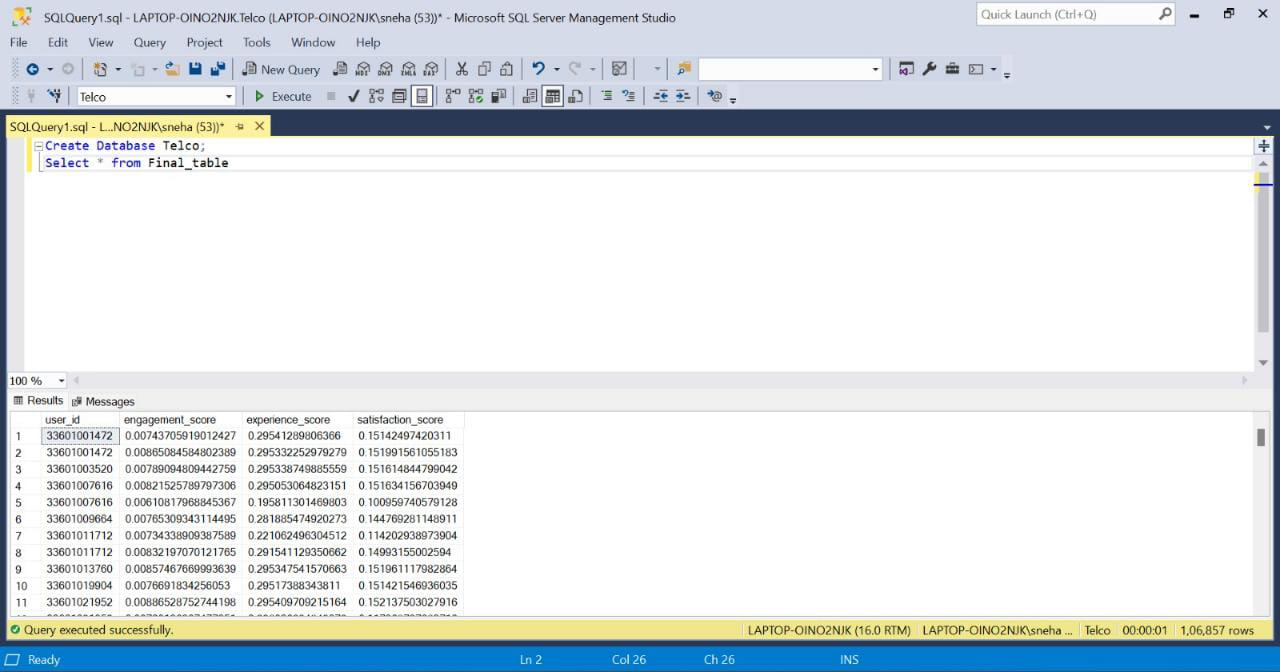

In [57]:
from flask import Flask,jsonify,request
import pickle

In [ ]:
#app = Flask(__name__)


#@app.route("/health_check") 
#def return_status():
#    return(jsonify({"result":"The connection is successful"}))

#if __name__=='__main__':
 #   app.run(debug=True,use_reloader=False,port=5000)

In [ ]:
import streamlit as st
st.text_input()

engagement_score = st.text_input("Enter the engagement score")
experience_score = st.text_input("Enter the experience score")

## Type Casting
engagement_score = float(engagement_score)
experience_score = float(experience_score)

In [75]:
import streamlit as st
st.text_input()


ModuleNotFoundError: No module named 'streamlit'